In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_width, img_height = 150, 150
batch_size=16

In [3]:
# Load the saved model
test_model = tf.keras.models.load_model('models/densenet121-model-bs16-ep50.keras')
print('model loaded')

model loaded


In [4]:
# Load test dataset
test_dir = 'data3a/test-real'

In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255
   )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 27 images belonging to 3 classes.


1/1 [==============================] - 3s 3s/step


C:\Users\sandi\AppData\Local\Temp\ipykernel_9672\252882169.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
C:\Users\sandi\AppData\Local\Temp\ipykernel_9672\252882169.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual


Confusion Matrix:


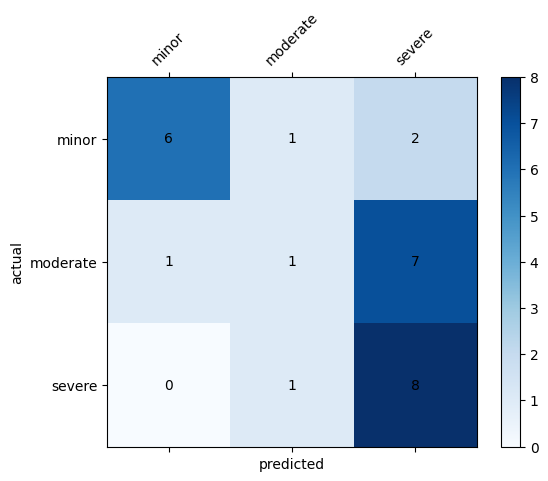

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.86      0.67      0.75         9
 02-moderate       0.33      0.11      0.17         9
   03-severe       0.47      0.89      0.62         9

    accuracy                           0.56        27
   macro avg       0.55      0.56      0.51        27
weighted avg       0.55      0.56      0.51        27



In [6]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = [], []
class_names = sorted(test_generator.class_indices.keys())
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    test_images.extend(images)
    test_labels.extend(np.argmax(labels, axis=1))


test_images = np.array(test_images)
test_labels = np.array(test_labels)

predictions = test_model.predict(test_images)

from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = test_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Blues')

cbar = fig.colorbar(cax)

ax.set_xlabel('predicted') #predicted
ax.set_ylabel('actual') #actual

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()


report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

1/1 [==============================] - 0s 77ms/step


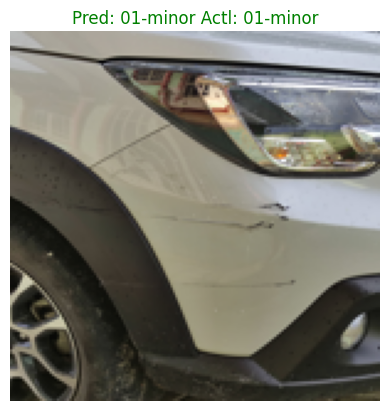

1/1 [==============================] - 0s 82ms/step


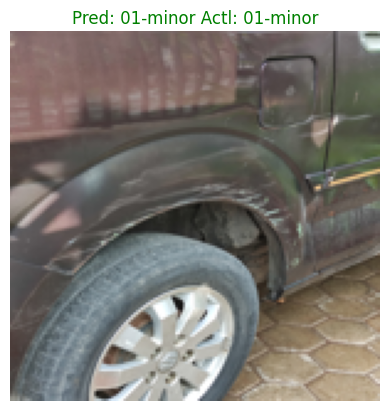

1/1 [==============================] - 0s 87ms/step


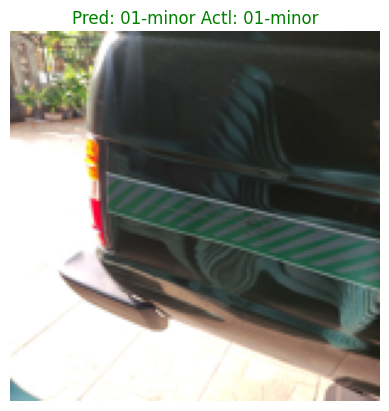

1/1 [==============================] - 0s 90ms/step


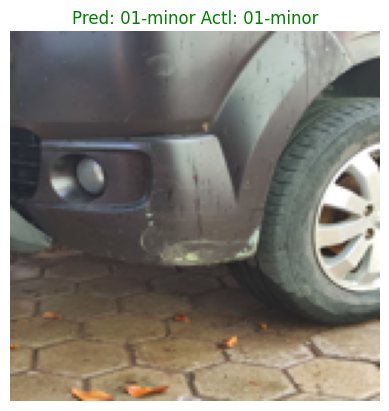

1/1 [==============================] - 0s 89ms/step


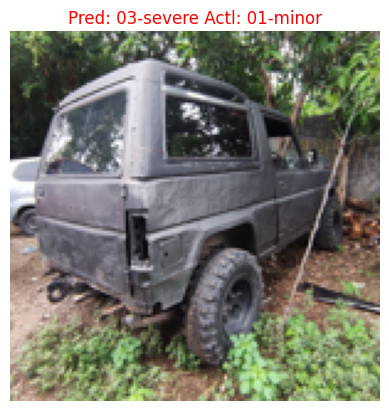

1/1 [==============================] - 0s 85ms/step


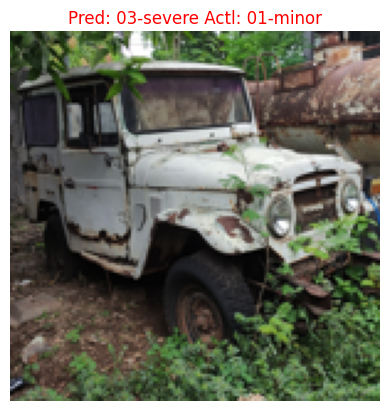

1/1 [==============================] - 0s 82ms/step


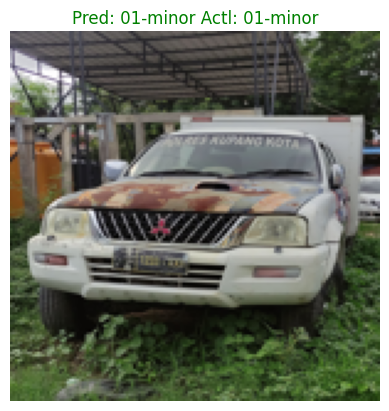

1/1 [==============================] - 0s 80ms/step


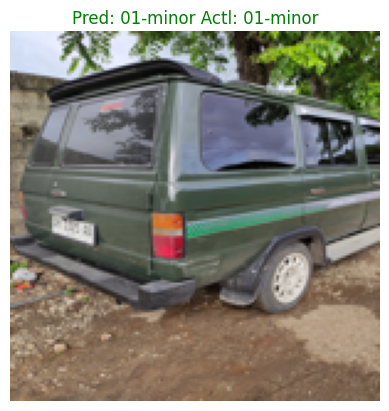

1/1 [==============================] - 0s 104ms/step


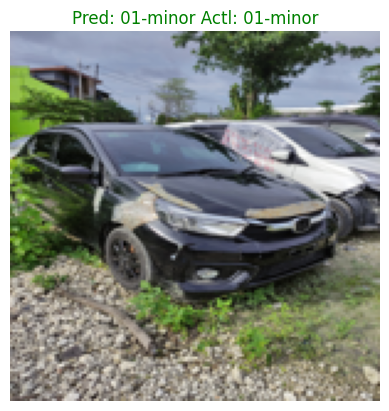

1/1 [==============================] - 0s 81ms/step


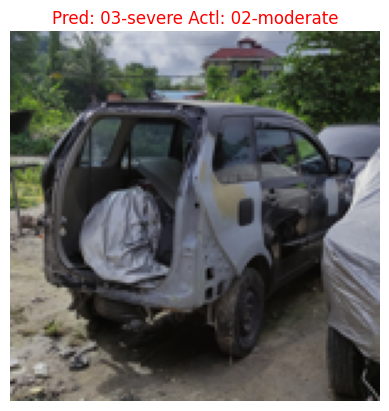

1/1 [==============================] - 0s 84ms/step


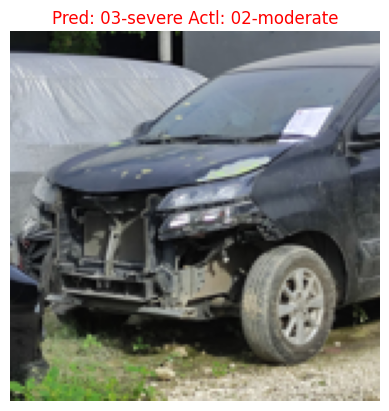

1/1 [==============================] - 0s 88ms/step


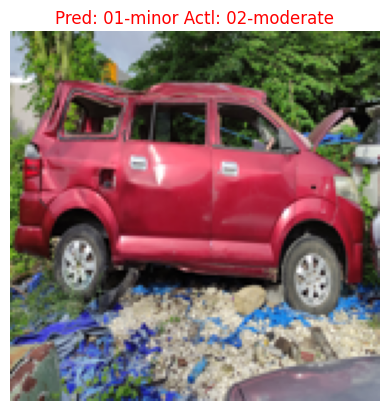

1/1 [==============================] - 0s 87ms/step


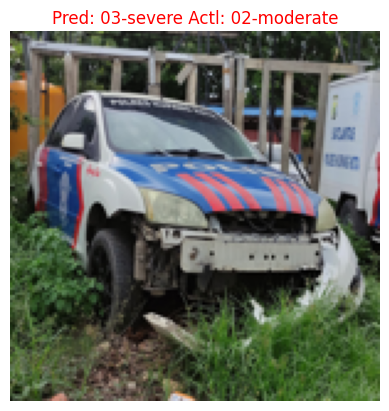

1/1 [==============================] - 0s 86ms/step


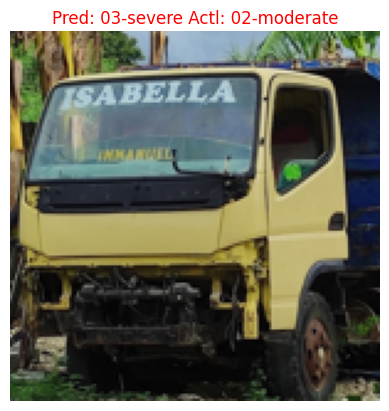

1/1 [==============================] - 0s 89ms/step


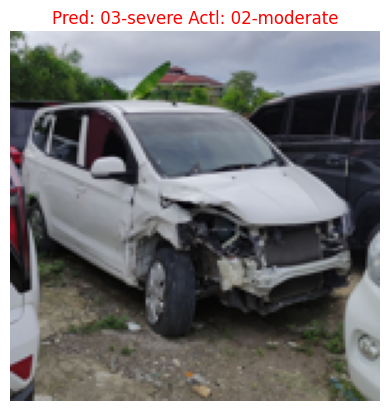

1/1 [==============================] - 0s 79ms/step


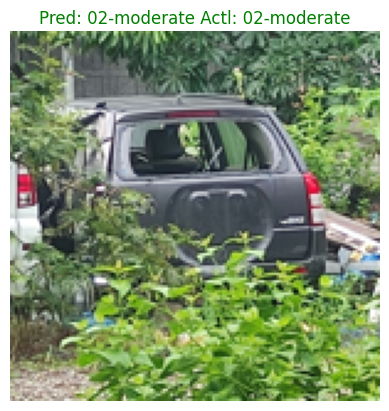

1/1 [==============================] - 0s 100ms/step


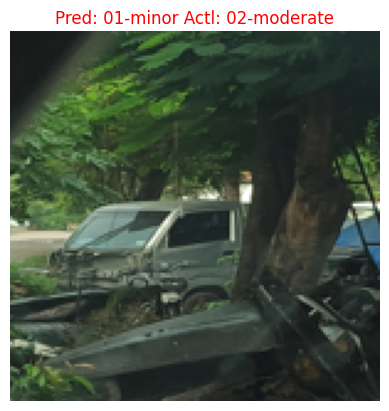

1/1 [==============================] - 0s 60ms/step


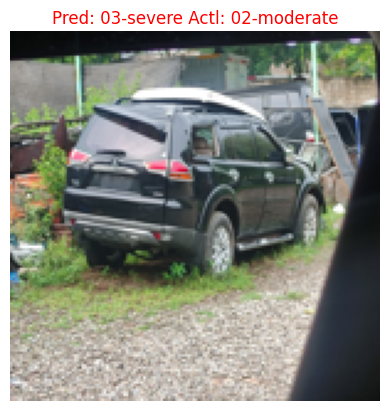

1/1 [==============================] - 0s 94ms/step


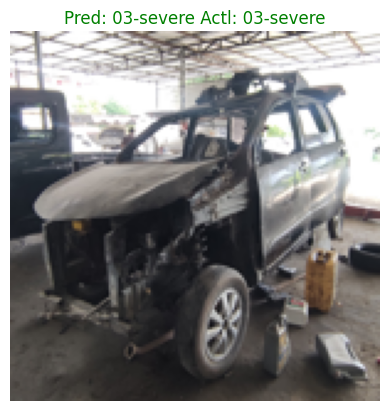

1/1 [==============================] - 0s 69ms/step


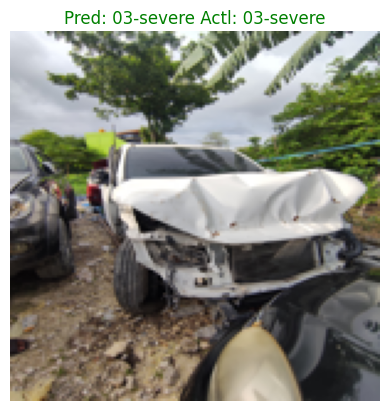

1/1 [==============================] - 0s 64ms/step


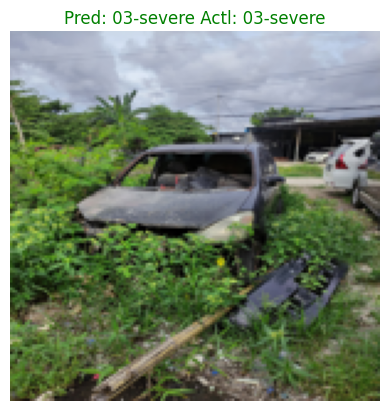

1/1 [==============================] - 0s 91ms/step


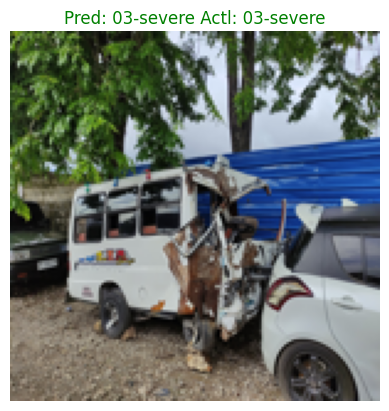

1/1 [==============================] - 0s 88ms/step


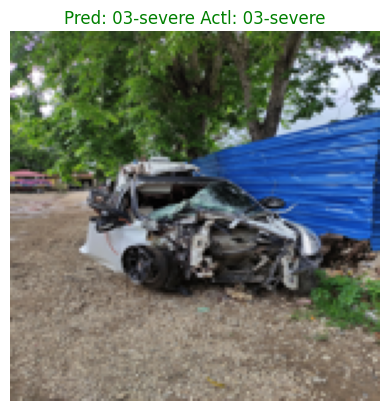

1/1 [==============================] - 0s 83ms/step


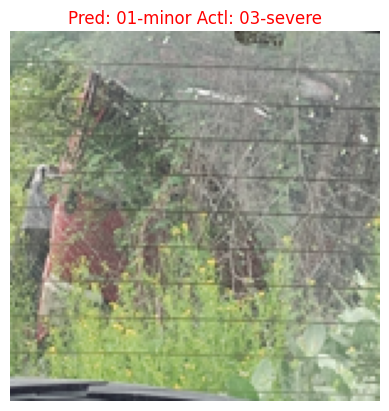

1/1 [==============================] - 0s 78ms/step


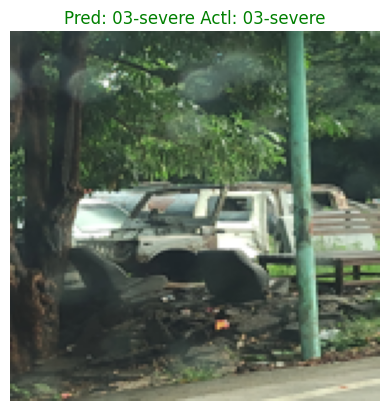

1/1 [==============================] - 0s 79ms/step


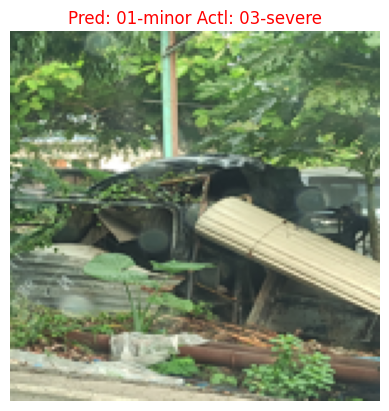

1/1 [==============================] - 0s 80ms/step


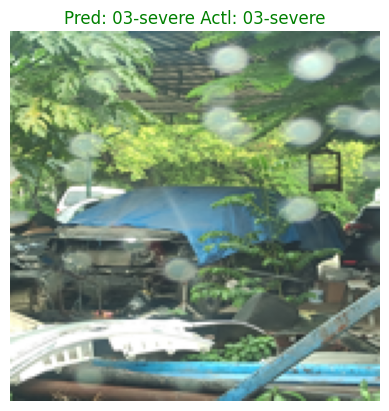

False: 12
True: 15


In [7]:
test_dir = 'data3a/test-real'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(test_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = test_model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))